<a href="https://colab.research.google.com/github/xper100/AIBootCamp-Project/blob/master/%5Bsection4_Project%5D_%EB%8B%A4%EC%A4%91%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%8B%AC%EB%A6%AC%ED%8C%8C%EC%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 목적

- **최종목적**: 

  다중감정분류를 활용한 맞춤 서비스 및 제품 추천 서비스 개발

- **이번 프로젝트의 목적**:

  최종목적의 첫 단계인 세그먼트작업 수행


# 동기부여

현대인의 있어서 우울증과 같은 정신질환들이 점차 심각해지는 것을 볼 수 있음

하지만, 정신질환에 대한 인식이 안좋아 심리상담을 통해 치료를 받지 못하는 경우가 많음

대화를 통해 현대인의 정신건강을 증진시킬 수 있는 방안을 찾고자 함

# 프로젝트 활용방안

  - 대화를 통한 스트레스 지수, 우울증 지수 등의 정신감정을 받아 위험성을 인지하는데 도울 수 있음 (헬스케어 관련 서비스)

  - 정신질환 유무를 쉽게 판단하여 질환으로서 받아들이고 치료를 받을 수 있게 도움

  - 상담이 어려운 사람에게는 심리안정에 도움이 될 수 있는 제품 추천 (티, 운동, 음식 등)



# 데이터 설명

1. 약 28만개의 데이터를 가지고 있으며 데이터마다 1~4개의 사람문장을 가지고 있으며 각각 시스템의 응답을 포함함

2. 총 6개의 감정대분류 **`기쁨, 당황, 분노, 불안, 상처, 슬픔`**을 가짐

3. 프로젝트에서는 감정대분류와 사람문장1만을 써서 분류모델에 쓰임



# 데이터 업로드

In [1]:
import re
import string

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def import_data(path = 'GD'):
  # Local GPU 
  if path == 'Local':
    path_train = './section4-project/감성대화/Training/감성대화말뭉치(최종데이터)_Training/감성대화말뭉치(최종데이터)_Training.xlsx'
    path_val = './section4-project/감성대화/Validation/감성대화말뭉치(최종데이터)_Validation/감성대화말뭉치(최종데이터)_Validation.xlsx'
  elif path == 'GD':
    # Google Drive
    path_train = '/content/drive/MyDrive/Colab Notebooks/AI부트캠프/Section 4/section4 - Project/말뭉치들/감성대화말뭉치(최종데이터)_Training.xlsx'
    path_val = '/content/drive/MyDrive/Colab Notebooks/AI부트캠프/Section 4/section4 - Project/말뭉치들/감성대화말뭉치(최종데이터)_Validation.xlsx'


  val = pd.read_excel(path_val)
  train = pd.read_excel(path_train, sheet_name='287319')

  # delete unnecessary columns
  del_col = ['번호','신체질환','시스템응답1','시스템응답2','시스템응답3','사람문장3','사람문장4']
  val.drop(del_col, axis = 1, inplace = True)
  train.drop(del_col, axis = 1, inplace = True)
  return val, train
val, train = import_data(path = 'GD')  
val.head()

,연령,성별,상황키워드,감정_대분류,감정_소분류,사람문장1,사람문장2,시스템응답4
0,청년,여성,"진로, 취업, 직장",분노,툴툴대는,요즘 부모님과 많이 부딪혀.,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,NaN
1,청소년,남성,가족관계,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,NaN
2,청소년,남성,학교폭력/따돌림,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,NaN
3,청년,남성,"진로, 취업, 직장",당황,죄책감의,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,곧 있으면 인턴에서 정규직 전환 평가가 있는데 안 좋을 것 같아.,NaN
4,중년,여성,"재정, 은퇴, 노후준비",분노,노여워하는,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,어떻게 그럴 수가 있지? 너무 화가 나.,NaN


In [3]:
train.head()

,연령,성별,상황키워드,감정_대분류,감정_소분류,사람문장1,사람문장2,시스템응답4
0,청년,남성,"연애, 결혼, 출산",기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아 지금 정말 신이 나.,NaN
1,노년,남성,"건강, 죽음",불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,NaN
2,청소년,여성,학업 및 진로,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,노년,남성,재정,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,NaN
4,노년,여성,재정,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,NaN


In [4]:
print('클래스:')
print('감정대분류: {0}\n감정소분류: {1}'.format(train['감정_대분류'].nunique(), train['감정_소분류'].nunique()))
print('--------------------------')
print('성비: \n{0}'.format(round( train['성별'].value_counts()/len(train), 4)))
print('--------------------------')
print('연령대: \n{0}'.format(round( train['연령'].value_counts()/len(train), 4)))

클래스:
감정대분류: 8
감정소분류: 58
--------------------------
성비: 
여성    0.5558
남성    0.4442
Name: 성별, dtype: float64
--------------------------
연령대: 
청년     0.3059
중년     0.2663
노년     0.2483
청소년    0.1795
Name: 연령, dtype: float64


In [5]:
# import getpass
# import os

# password = getpass.getpass()

# command1 = "sudo -S apt-get install -y fonts-nanum" # 나눔폰트 다운
# os.system('echo %s | %s' % (password, command1))

# command2 = "sudo -S fc-cache -fv" 
# os.system('echo %s | %s' % (password, command2))



In [ ]:
# # 한글깨짐현상
# !echo Wndbs9526! | sudo -S apt-get install -y fonts-nanum
# !echo Wndbs9526! | sudo -S fc-cache -fv
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


#### Reference: https://teddylee777.github.io/colab/colab-korean

In [ ]:
# 한글세팅
plt.rc("font", family="NanumBarunGothic" ) 
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False}, 
        style = "darkgrid",
        font_scale = 1.5)

# 시각화
ax = sns.catplot(
      data = train, kind = 'count',
      x = '연령', hue = '성별', 
      order = ['청소년', '청년', '중년', '노년'],
      height = 6, aspect = 1.2
     )
ax.despine(left=True)
ax.set_axis_labels('','데이터 갯수(Count)')
ax.set(title = '연령별 성비')

# 데이터 전처리 (SOYNLP)

## Download soynlp, konlpy, Mecap

In [ ]:
!pip3 install soynlp
!pip3 install konlpy

In [ ]:
# Mecab git clone (Colab)
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
cd Mecab-ko-for-Google-Colab

In [ ]:
!bash install_mecab-ko_on_colab190912.sh

In [29]:
# cd section4-project/

In [30]:
# # Local connection
# !git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
# cd mecab-python-0.996
!pip install mecab-python3 


### 형태소 분류

In [31]:
# 한글만 남기기
def only_words(text):
  regex = '[^가-힣+]' # 한글만
  #  한글 정규식
  text = re.sub('\u2028','',text) # 유니코드 에러 없애기
  text = re.sub(regex,'',text)
  return text

train['사람문장1'] = train['사람문장1'].apply(only_words)
train['사람문장1'].head()

0                 아내가드디어출산하게되어서정말신이나
1      당뇨랑합병증때문에먹어야할약이열가지가넘어가니까스트레스야
2    고등학교에올라오니중학교때보다수업이갑자기어려워져서당황스러워
3    재취업이돼서받게된첫월급으로온가족이외식을할예정이야너무행복해
4               빚을드디어다갚게되어서이제야안도감이들어
Name: 사람문장1, dtype: object

#### Mecab()

In [32]:
# 형태소 분류하기
from konlpy.tag import Mecab
mecab = Mecab()

tokens = []

for doc in range(len(train['사람문장1'])):
  doc_tokens = mecab.morphs(train['사람문장1'][doc])
  tokens.append(doc_tokens)

train['morphs'] = tokens
train['morphs'].head()  

0             [아내, 가, 드디어, 출산, 하, 게, 되, 어서, 정말, 신, 이나]
1    [당뇨, 랑, 합병증, 때문, 에, 먹, 어야, 할, 약, 이, 열, 가지, 가, ...
2    [고등학교, 에, 올라오, 니, 중학교, 때, 보다, 수업, 이, 갑자기, 어려워져...
3    [재취업, 이, 돼서, 받, 게, 된, 첫, 월급, 으로, 온, 가족, 이, 외식,...
4       [빚, 을, 드디어, 다, 갚, 게, 되, 어서, 이제야, 안도감, 이, 들, 어]
Name: morphs, dtype: object

## 불용어 처리

출처: 

https://wikidocs.net/22530

https://www.ranks.nl/stopwords/korean

추가: ['걔','잘','걍','한','하다']


In [33]:
# 불용어 리스트 불러오기
path_stopwords = '/content/drive/MyDrive/Colab Notebooks/AI부트캠프/Section 4/section4 - Project/korean_stopword.txt'
stopwords = pd.read_csv(path_stopwords, sep= ',', encoding = 'utf-8', header = None)

# 컬럼명 정한 후 리스트로 변환
stopwords.columns = ['stopword']
stopwords_list = stopwords['stopword'].to_list()
print(stopwords_list)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [34]:
# 불용어 처리하고 토큰컬럼 추가
tokens = []

for doc in train['morphs']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in stopwords_list:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
train['token'] = tokens
train['token'].head()

0                   [아내, 드디어, 출산, 게, 되, 어서, 정말, 신, 이나]
1    [당뇨, 랑, 합병증, 때문, 먹, 어야, 할, 약, 열, 가지, 넘어가, 니까, ...
2     [고등학교, 올라오, 니, 중학교, 보다, 수업, 갑자기, 어려워져서, 당황, 스러워]
3    [재취업, 돼서, 받, 게, 된, 첫, 월급, 온, 가족, 외식, 할, 예정, 이야...
4                   [빚, 드디어, 다, 갚, 게, 되, 어서, 이제야, 안도감]
Name: token, dtype: object

## 토근 시각화

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.


### 1. Top 10의 단어들

In [35]:
# Top 10의 단어들
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
train['token'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(30)

[('는데', 8873),
 ('내', 7769),
 ('친구', 7436),
 ('있', 6319),
 ('해', 6312),
 ('했', 5804),
 ('지', 5634),
 ('게', 5507),
 ('같', 4539),
 ('없', 3805),
 ('었', 3491),
 ('안', 3475),
 ('좋', 3376),
 ('않', 3227),
 ('해서', 3105),
 ('만', 2716),
 ('받', 2629),
 ('되', 2626),
 ('어서', 2568),
 ('았', 2484),
 ('사람', 2457),
 ('보', 2341),
 ('다', 2325),
 ('회사', 2271),
 ('아서', 2259),
 ('오늘', 2241),
 ('요즘', 2208),
 ('기', 2204),
 ('말', 2182),
 ('님', 2096)]

In [36]:
# 토큰화된 단어들의 비율측정
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
 
    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [37]:
wc = word_count(train['token'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
87,는데,8717,8873,1.0,0.021123,0.021123,0.213239
65,내,7243,7769,2.0,0.018495,0.039618,0.177181
92,친구,6734,7436,3.0,0.017702,0.057321,0.164730
63,있,5961,6319,4.0,0.015043,0.072364,0.145821
32,해,6017,6312,5.0,0.015027,0.087391,0.147190
84,했,5416,5804,6.0,0.013817,0.101208,0.132489
91,지,5322,5634,7.0,0.013412,0.114620,0.130189
7,게,5168,5507,8.0,0.013110,0.127730,0.126422
182,같,4431,4539,9.0,0.010806,0.138536,0.108393
208,없,3629,3805,10.0,0.009058,0.147594,0.088774


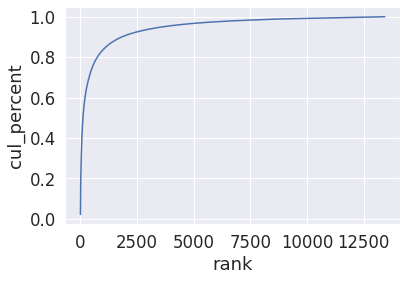

In [38]:
import seaborn as sns

sns.lineplot(x = 'rank', y = 'cul_percent', data = wc)

## Word2Vec VS FastText

### 1. Word2Vec

In [39]:
from gensim.models import Word2Vec as w2v

# 유니크한 단어 갯수
max_features = wc['word'].nunique()
vector_size = 100

# Word2Vec 훈련
w2v_model = w2v(sentences=train['token'], size = vector_size, window = 2, min_count=50, workers = 4, iter = 100, sg=1)

In [40]:
# 완성된 임베딩 매트릭스의 크기 확인
w2v_model.wv.vectors.shape

(1001, 100)

In [41]:
print(w2v_model.wv.most_similar('학교'))

[('대학교', 0.5397993326187134), ('전학', 0.5202388763427734), ('폭력', 0.4895731508731842), ('반', 0.4730961322784424), ('대학', 0.47270825505256653), ('따돌림', 0.4555169343948364), ('선생', 0.4503727853298187), ('가해자', 0.4263954758644104), ('고등학교', 0.42186665534973145), ('학생', 0.4193178713321686)]


### 2. Fasttext

In [42]:
from gensim.models.fasttext import FastText

fasttext_model = FastText(train['token'], size=100, workers=4, sg=1, iter=2, word_ngrams=5)
# 모델 저장
fasttext_model.save('fasttext.model')
saved_fasttext = FastText.load('fasttext.model')

print(saved_fasttext.wv.most_similar('학교'))

[('폭력', 0.8607462048530579), ('반', 0.8574807643890381), ('괴롭힘', 0.8367255926132202), ('왕따', 0.827160120010376), ('전학', 0.8261736631393433), ('따돌림', 0.8256490230560303), ('신고', 0.8179529905319214), ('가해자', 0.8165575265884399), ('위원회', 0.8083986043930054), ('중학교', 0.8078899383544922)]


## Pre-trained Fasttext

출처: https://fasttext.cc/docs/en/crawl-vectors.html


In [43]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.


In [44]:
!pip install fastText

     |████████████████████████████████| 71kB 6.0MB/s 
  Created wheel for fastText: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3093665 sha256=33dbe9317bc1074034f9f1d52607511c08db0a0c814159e640cbc42c97a1253f
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fastText


- 경로설정

In [45]:
ls

fastText/       install_mecab-ko_on_colab190912.sh         README.md
fasttext.model  install_mecab-ko_on_colab_light_210108.sh
images/         LICENSE


In [46]:
cd content/drive/MyDrive

[Errno 2] No such file or directory: 'content/drive/MyDrive'
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab


In [47]:
# import fasttext
# import fasttext.util
# from gensim import models

# ko_ftmodel = fasttext.load_model('cc.ko.300.bin')
# # ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')

# from gensim import models

# ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin')


# 모델링

LSTM모델을 사용하고 총 3가지의 다른 방식을 사용할 것이다.

1. LSTM(Word2Vec)

2. LSTM(FastText)

3. LSTM(FastText with Attention)

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, Flatten, BatchNormalization,Attention
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

In [49]:
# 띄어쓰기의 존재로 다른 클래스로 인식 
train['감정_대분류'] = train['감정_대분류'].apply(lambda x: x.strip())
train['감정_소분류'] = train['감정_소분류'].apply(lambda x: x.strip())

# 감정 대분류와 소분류 클래스 나누기
large_label = train['감정_대분류']
small_label = train['감정_소분류']
large_label.unique() 

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처'], dtype=object)

In [50]:
# Label Encoding - 감정대분류 (8)
encoder = LabelEncoder()
large_label_encoded = encoder.fit_transform(large_label)
large_label_encoded


array([0, 3, 1, ..., 5, 0, 3])

In [51]:
# 인코딩된 값들 확인
encoder_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
encoder_mapping

{'기쁨': 0, '당황': 1, '분노': 2, '불안': 3, '상처': 4, '슬픔': 5}

## 모델학습 및 텍스트 분류

- Train, Test 20%의 비율료 설정
- Tokenizer(num_words = 1000)
- pad_sequence의 maxlen = 300
- 학습파라미터 조정 (batch_size, epochs, validation_split)
- 평가(accuracy)

### 토큰환 한 데이터를 벡터값으로 변환하기

In [53]:
# 토큰화하기
features = train['token']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(features)

In [54]:
# sequence 형태로 전환
tokenized_feature = tokenizer.texts_to_sequences(features)

max_len = max(len(sent) for sent in tokenized_feature)
print(max_len)

37


In [58]:
# train, test 데이터 분리 (20% test)
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(tokenized_feature, large_label_encoded, test_size = 0.2, random_state = 1214)

In [59]:
# pad_sequences
## Train
X_train_sequence=pad_sequences(X_train_encoded, maxlen=400, padding='post')
y_train=np.array(y_train)

## Test
X_test_sequence=pad_sequences(X_test_encoded, maxlen=400, padding='post')
y_test=np.array(y_test)

In [60]:
vocab_size = len(tokenizer.word_index) + 1
tokenizer.word_index.items()

dict_items([('는데', 1), ('내', 2), ('친구', 3), ('있', 4), ('해', 5), ('했', 6), ('지', 7), ('게', 8), ('같', 9), ('없', 10), ('었', 11), ('안', 12), ('좋', 13), ('않', 14), ('해서', 15), ('만', 16), ('받', 17), ('되', 18), ('어서', 19), ('았', 20), ('사람', 21), ('보', 22), ('다', 23), ('회사', 24), ('아서', 25), ('오늘', 26), ('요즘', 27), ('기', 28), ('말', 29), ('님', 30), ('겠', 31), ('던', 32), ('돈', 33), ('정말', 34), ('다고', 35), ('면', 36), ('거', 37), ('할', 38), ('걱정', 39), ('스러워', 40), ('싶', 41), ('아내', 42), ('주', 43), ('때문', 44), ('건강', 45), ('수', 46), ('한테', 47), ('생각', 48), ('남편', 49), ('힘들', 50), ('니', 51), ('못', 52), ('결혼', 53), ('라고', 54), ('많이', 55), ('서', 56), ('직장', 57), ('집', 58), ('기분', 59), ('돼', 60), ('마음', 61), ('학교', 62), ('아들', 63), ('적', 64), ('많', 65), ('모르', 66), ('엄마', 67), ('당황', 68), ('준비', 69), ('해야', 70), ('슬퍼', 71), ('먹', 72), ('불안', 73), ('랑', 74), ('남자', 75), ('나이', 76), ('자식', 77), ('짜증', 78), ('화가', 79), ('살', 80), ('이제', 81), ('부모', 82), ('가족', 83), ('자꾸', 84), ('알', 85), ('더', 86), ('취업',

In [61]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

In [62]:
# Recall, Precision, F1 Score
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [108]:
# 모델 저장시 HDF5 Format으로 저장
!pip install pyyaml h5py

### LSTM(Word2Vec)


In [63]:
# embedding vectors (Word2Vec)
vocab_size, embedding_size = w2v_model.wv.vectors.shape
w2v_weights = w2v_model.wv.vectors

model_w2v = Sequential()
model_w2v.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_size,
                    weights = [w2v_weights], # w2v weights
                    input_length = 200,
                    trainable = False))
model_w2v.add(LSTM(128, dropout = 0.2, recurrent_dropout=0.2, activation='relu')) # LSTM
model_w2v.add(Dense(6, activation='softmax'))

In [94]:
model_w2v.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          100100    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 218,122
Trainable params: 118,022
Non-trainable params: 100,100
_________________________________________________________________


In [100]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.5.0


In [105]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path_w2v = "Word2Vec/cp-{epoch:04d}.ckpt"
checkpoint_dir_w2v = os.path.dirname(checkpoint_path_w2v)

# Save the weights using the `checkpoint_path` format
model_w2v.save_weights(checkpoint_path_w2v.format(epoch=0))

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_w2v,
                                                 save_weights_only=True,
                                                 verbose=1)

In [64]:
model_w2v.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['acc', f1_m])
history_w2v = model_w2v.fit(X_train_sequence, y_train, batch_size=64, epochs=10, validation_split=0.1, 
                    callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=2),
                               cp_callback] )

Epoch 1/10
460/460 [==============================] - 662s 1s/step - loss: 1.7931 - acc: 0.1743 - f1_m: 5.9067 - val_loss: 1.7904 - val_acc: 0.1675 - val_f1_m: 6.4020
Epoch 2/10
460/460 [==============================] - 632s 1s/step - loss: 1.7913 - acc: 0.1725 - f1_m: 6.1173 - val_loss: 1.7902 - val_acc: 0.1785 - val_f1_m: 5.9719
Epoch 3/10
460/460 [==============================] - 645s 1s/step - loss: 1.7912 - acc: 0.1790 - f1_m: 5.9700 - val_loss: 1.7904 - val_acc: 0.1785 - val_f1_m: 5.9719
Epoch 4/10
460/460 [==============================] - 646s 1s/step - loss: 1.7910 - acc: 0.1756 - f1_m: 5.9153 - val_loss: 1.7905 - val_acc: 0.1785 - val_f1_m: 5.9719


In [65]:
pred_w2v = model_w2v.predict_classes(X_test_sequence)
np.unique(pred_w2v)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])

In [66]:
accr_w2v = model_w2v.evaluate(X_test_sequence, y_test)
accr_w2v

256/256 [==============================] - 30s 116ms/step - loss: 1.7908 - acc: 0.1794 - f1_m: 6.0956


[1.7907899618148804, 0.1794275939464569, 6.095646858215332]

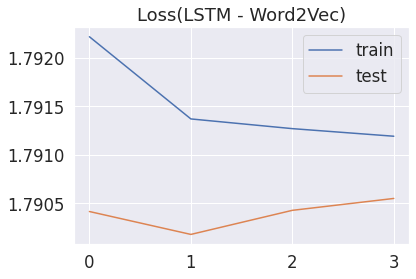

In [67]:
plt.title('Loss(LSTM - Word2Vec)')
plt.plot(history_w2v.history['loss'], label='train')
plt.plot(history_w2v.history['val_loss'], label='test')
plt.legend()
plt.show();

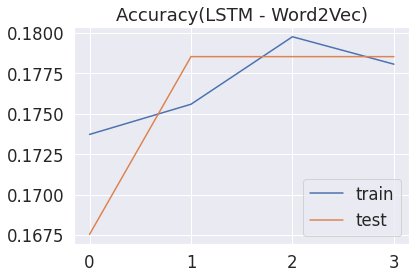

In [68]:
plt.title('Accuracy(LSTM - Word2Vec)')
plt.plot(history_w2v.history['acc'], label='train')
plt.plot(history_w2v.history['val_acc'], label='test')
plt.legend()
plt.show();

In [69]:
new_complaint = ['어제 칭찬받아서 엄청 행복해']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=400)
pred = model_w2v.predict(padded)
labels = ['기쁨', '당황', '분노', '불안', '상처', '슬픔']
print(labels[np.argmax(pred)])

불안


### LSTM(FastText)


In [70]:
# embedding vectors (FastText)
vocab_size, embedding_size = saved_fasttext.wv.vectors.shape
fasttext_weights = saved_fasttext.wv.vectors

model_ft = Sequential()
model_ft.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_size,
                    weights = [fasttext_weights], # w2v weights
                    input_length = 200,
                    trainable = False))
model_ft.add(LSTM(128, dropout = 0.2, recurrent_dropout=0.2, activation='relu')) # LSTM
model_ft.add(Dense(6, activation='softmax'))

In [95]:
model_ft.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          468400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 586,422
Trainable params: 118,022
Non-trainable params: 468,400
_________________________________________________________________


In [106]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path_ft = "FastText/cp-{epoch:04d}.ckpt"
checkpoint_dir_ft = os.path.dirname(checkpoint_path_ft)

# Save the weights using the `checkpoint_path` format
model_ft.save_weights(checkpoint_path_ft.format(epoch=0))

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_ft,
                                                 save_weights_only=True,
                                                 verbose=1)

In [71]:
model_ft.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['acc', f1_m])
history_fasttext = model_ft.fit(X_train_sequence, y_train, batch_size=64, epochs=10, validation_split=0.1, 
                    callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=2),
                               cp_callback] )

Epoch 1/10
460/460 [==============================] - 654s 1s/step - loss: 1.7931 - acc: 0.1733 - f1_m: 5.8619 - val_loss: 1.7907 - val_acc: 0.1626 - val_f1_m: 6.8321
Epoch 2/10
460/460 [==============================] - 651s 1s/step - loss: 1.7913 - acc: 0.1740 - f1_m: 6.0728 - val_loss: 1.7904 - val_acc: 0.1785 - val_f1_m: 5.9719
Epoch 3/10
460/460 [==============================] - 651s 1s/step - loss: 1.7912 - acc: 0.1789 - f1_m: 5.8784 - val_loss: 1.7905 - val_acc: 0.1785 - val_f1_m: 5.9719
Epoch 4/10
460/460 [==============================] - 650s 1s/step - loss: 1.7910 - acc: 0.1792 - f1_m: 5.9761 - val_loss: 1.7904 - val_acc: 0.1785 - val_f1_m: 5.5419


In [72]:
pred_ft = model_ft.predict_classes(X_test_sequence)
np.unique(pred_ft)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])

In [73]:
accr_ft = model_ft.evaluate(X_test_sequence, y_test)
accr_ft

256/256 [==============================] - 30s 116ms/step - loss: 1.7907 - acc: 0.1794 - f1_m: 5.6648


[1.790725588798523, 0.1794275939464569, 5.664775371551514]

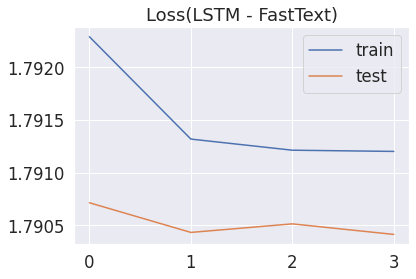

In [75]:
plt.title('Loss(LSTM - FastText)')
plt.plot(history_fasttext.history['loss'], label='train')
plt.plot(history_fasttext.history['val_loss'], label='test')
plt.legend()
plt.show();

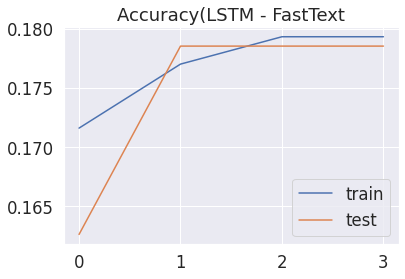

In [77]:
plt.title('Accuracy(LSTM - FastText')
plt.plot(history_fasttext.history['acc'], label='train')
plt.plot(history_fasttext.history['val_acc'], label='test')
plt.legend()
plt.show();

In [78]:
new_complaint = ['어제 칭찬받아서 엄청 행복해']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=400)
pred = model_ft.predict(padded)
labels = ['기쁨', '당황', '분노', '불안', '상처', '슬픔']
print(labels[np.argmax(pred)])

불안


### LSTM(FastText) with Attention NN


In [81]:
# embedding vectors (FastText)
vocab_size, embedding_size = saved_fasttext.wv.vectors.shape
fasttext_weights = saved_fasttext.wv.vectors

model_att = Sequential()
model_att.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_size,
                    weights = [fasttext_weights], # w2v weights
                    input_length = 200,
                    trainable = False))
model_att.add(LSTM(256, dropout = 0.1, recurrent_dropout=0.1, activation='relu')) # LSTM
model_att.add(Dropout(0.25))
# model_att.add(Attention(max_len))
model_att.add(Dense(128, activation = 'relu'))
model_att.add(Dropout(0.1))
model_att.add(BatchNormalization())
model_att.add(Dense(64, activation='relu'))
model_att.add(Dropout(0.1))
model_att.add(BatchNormalization())
model_att.add(Dense(6, activation='softmax'))

In [107]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path_att = "FastText_with_Attention/cp-{epoch:04d}.ckpt"
checkpoint_dir_att = os.path.dirname(checkpoint_path_att)

# Save the weights using the `checkpoint_path` format
model_att.save_weights(checkpoint_path_att.format(epoch=0))

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_att,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model_att.summary()

In [82]:
model_att.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['acc', f1_m])
history_att = model_att.fit(X_train_sequence, y_train, batch_size=64, epochs=10, validation_split=0.1, 
                    callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=2),
                               cp_callback] )

Epoch 1/10
460/460 [==============================] - 1886s 4s/step - loss: nan - acc: 0.1679 - f1_m: nan - val_loss: nan - val_acc: 0.1620 - val_f1_m: nan
Epoch 2/10
460/460 [==============================] - 1860s 4s/step - loss: nan - acc: 0.1669 - f1_m: nan - val_loss: nan - val_acc: 0.1620 - val_f1_m: nan


In [83]:
pred_att = model_att.predict_classes(X_test_sequence)
np.unique(pred_att)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

In [84]:
accr_att = model_att.evaluate(X_test_sequence, y_test)
accr_att

256/256 [==============================] - 90s 352ms/step - loss: nan - acc: 0.1660 - f1_m: nan


[nan, 0.16597357392311096, nan]

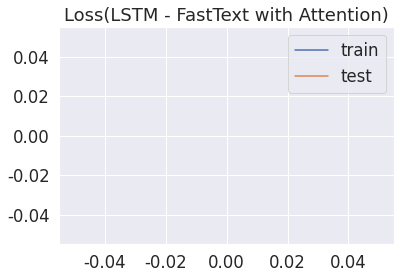

In [88]:
plt.title('Loss(LSTM - FastText with Attention)')
plt.plot(history_att.history['loss'], label='train')
plt.plot(history_att.history['val_loss'], label='test')
plt.legend()
plt.show();

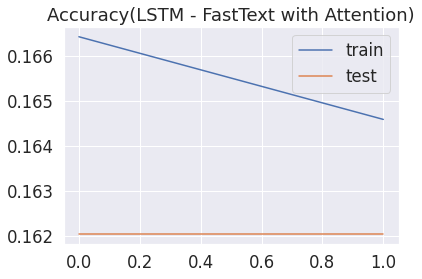

In [89]:
plt.title('Accuracy(LSTM - FastText with Attention)')
plt.plot(history_att.history['acc'], label='train')
plt.plot(history_att.history['val_acc'], label='test')
plt.legend()
plt.show();

In [90]:
new_complaint = ['어제 칭찬받아서 엄청 행복해']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=400)
pred = model_att.predict(padded)
labels = ['기쁨', '당황', '분노', '불안', '상처', '슬픔']
print(labels[np.argmax(pred)])

기쁨


## 결과비교

In [92]:
 eval_result = [accr_w2v, accr_ft, accr_att]
eval_df = pd.DataFrame(eval_result, 
                       columns = ['Loss', 'Accuracy', 'F1_score'], 
                       index = ['Word2Vec', 'FastText', 'FastText with attention'])
eval_df

,Loss,Accuracy,F1_score
Word2Vec,1.790790,0.179428,6.095647
FastText,1.790726,0.179428,5.664775
FastText with attention,NaN,0.165974,NaN


# 한계점 및 개선방향

1. Word2Vec과 FastText를 적용한 LSTM모델들은 모든 데이터에 '기쁨'으로 분류하여 모델의 성능이 현저히 떨어짐

2. FastText와 Attention메소드를 적용한 모델에는 Loss가 계산이 안되는 문제점 발생 

  - 전처리를 다시 적용
  - Dropout 비율을 낮추기
  - 6개의 클래스를 다 쓰기 보다 선정하여 재모델링

3. 다중분류와 관련된 모델에 대한 적용이 필요

4. Pre-trained 모델을 사용하지 못함

  - FastText, Konlp 등

5. 감성대화 전체를 늘려 데이터의 양을 늘려서 모델링
  
  - 사람문장1~4를 개별적으로 적용

6. 연령별 및 상황키워드에 따른 세그먼트에 다른 모델링적용





In [1]:
# Requirement.txt 생성
!pip3 freeze > requirements.txt

# Reference

- FastText 공식문서

https://fasttext.cc/docs/en/crawl-vectors.html

- Pre-trained FastText 활용방법:

https://inahjeon.github.io/fasttext/

- 한국어 자연어처리 방법들

https://wikidocs.net/50739

- 불용어


https://wikidocs.net/22530

https://www.ranks.nl/stopwords/korean

- KoNLPy 형태소 분석 라이브러리
  - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
    http://semanticweb.kaist.ac.kr/hannanum/

  * Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
    http://kkma.snu.ac.kr/

  * Komoran: 코모란. Shineware에서 개발.
    https://github.com/shin285/KOMORAN

  * Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
    https://bitbucket.org/eunjeon/mecab-ko
    
  * Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
    https://github.com/open-korean-text/open-korean-text



